## Q32 傅立叶变换

-----
**参考**
* [https://www.jianshu.com/p/89ce7fdb9e12](https://www.jianshu.com/p/89ce7fdb9e12)
* [https://blog.csdn.net/Replus_/article/details/81945495](https://blog.csdn.net/Replus_/article/details/81945495)
* [https://blog.csdn.net/baidu_24919727/article/details/82079812](https://blog.csdn.net/baidu_24919727/article/details/82079812)

* [https://blog.csdn.net/baidu_24919727/article/details/82079812](https://blog.csdn.net/baidu_24919727/article/details/82079812)

------

## 理解
* 可将图像处理中傅里叶变换理解为：将一个复杂无规律的图像拆分成多个简单有规律的子图像来表示

* 图像频谱中的一个点对应子图像的一整张距离-灰度变化图

* 对图像信号而言，空间频率是指单位长度内亮度也就是灰度做周期性变化的次数，也就是变化剧烈程度的指标，可以理解灰度在平面空间上的梯度

* 高频部分 就是图像中灰度变化比较快的地方，比如噪声，边缘，跳跃部分，
* 低频分量 背景以及慢变区域。

> 距离原点越远=频率越高=原图中灰度值的变化越频繁

> 灰度值越大=幅值越大=原图中灰度值变化的范围越大

> *低通滤波*能保留图像的大致轮廓信息是因为，一张图像所记录到的主要信息（由于受到关照等必然因素的影响）在图像上灰度值的变化是缓慢的，因此主要信息集中在低频区域

> 而噪音等偶然因素是突然附加到图像上使得灰度值快速变化，而且密密麻麻，这导致N个像元内，灰度值的变化不仅频繁，而且变化的范围还很大。因此，噪音就位于图像频谱的高频区域，表现为高灰度值

-------

## 二维频谱特征

**参考**
* [https://blog.csdn.net/daduzimama/article/details/80109139](https://blog.csdn.net/daduzimama/article/details/80109139)

* [https://blog.csdn.net/daduzimama/article/details/80394570](https://blog.csdn.net/daduzimama/article/details/80394570)

--------
* **高低频率的分布**
在经过频谱居中后的频谱中，中间最亮的点是最低频率，属于直流分量（DC分量）。越往边外走，频率越高。频谱图中的四个角和X,Y轴的尽头都是高频。

* **频谱图的能量分布**

频谱中的能级分布

> DC分量所占能量最大最多，不论是二维还是一维都应该是这样。频率越高的部分，能量越少

* **变化方向的一致性**

> 空间域中横向的周期变化会反应在频谱图中的横轴上，而空间域中纵向的周期变化会反应在频谱图中的纵轴上
> 空间域中东南方向的周期变化会反应在频谱图中的东北方向

* **方向性**


## 公式
* [https://blog.csdn.net/asd20172016/article/details/80904634](https://blog.csdn.net/asd20172016/article/details/80904634)

$$F(u, v)=\sum_{x=0}^{m} \sum_{y=0}^{n} f(x, y) e^{2 \pi \cdot t}$$
$$t=\left(\frac{u x}{m}+\frac{v y}{n}\right)$$

## 图解

![图解](./pic/DFT.png)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## numpy函数

-------
* 使用numpy函数进行傅里叶变换
```
np.fft.fft2()
```


-----

* 将图像中的低频部分移动到图像的中心
```
np.fft.fftshift(img)
```

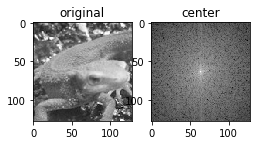

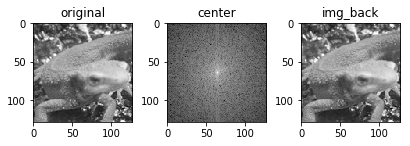

In [10]:
img = cv2.imread("gg.jpg", 0)
img_origin = img.copy()
(H, W) = img.shape

# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# 做频率变换
f_img = np.fft.fft2(img)
# 中心化
fshift = np.fft.fftshift(f_img)
# 取绝对值：将复数变化成实数； 取对数：为了将数据变化到0-255
# s1 = np.log(np.abs(fshift))
s1 = 20*np.log(np.abs(fshift))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('original')

plt.subplot(132)
plt.imshow(s1, cmap='gray')
plt.title('center')
plt.show()

# 逆傅里叶变换
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)


plt.subplot(131)
plt.imshow(gray, cmap="gray")
plt.title('original')

plt.subplot(132)
plt.imshow(s1, cmap='gray')
plt.title('center')

plt.subplot(133)
plt.imshow(img_back, cmap='gray')
plt.title('img_back')
plt.subplots_adjust(top=1.2, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.show()


## Q33 低通滤波
* [https://blog.csdn.net/u010682375/article/details/71159582](https://blog.csdn.net/u010682375/article/details/71159582)

-----

使用去除高频成分，保留低频成分的低通滤波器

在这里，假设从低频的中心到高频的距离为r，我们保留0.5r的低频分量，**将大于0.5r的频率设置为0**

1. 在频域图像上制作mask， 去除低频成分
2. 使用np.fft.ifftshift() 进行逆平移操作，所以现在直流分量又回到左上角了
3. 最后使用函数 np.ifft2() 进行 FFT 逆变换
4. 取绝对值

```
np.fft.ifftshift()
```

```
np.ifft2() 
```

## Q34 高通滤波



## Q35 带通滤波

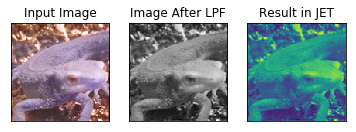

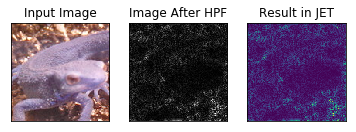

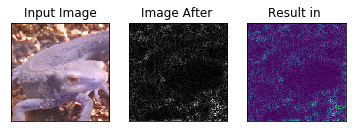

In [7]:
img = cv2.imread("gg.jpg")
img_origin = img.copy()

x = np.tile(np.arange(W), (H, 1))
y = np.arange(H).repeat(W).reshape(H, -1)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 做频率变换
f_img = np.fft.fft2(gray)
# 频谱中心化
fshift = np.fft.fftshift(f_img)
# 取绝对值：将复数变化成实数； 取对数：为了将数据变化到0-255
s = np.log(np.abs(fshift))

"""低通滤波

低频的中心到高频的距离为r，我们保留0.5r的低频分量
"""

# 注意 这是使用的是中心化后的频谱图fshift，不是取幅值后的频谱图
# 低频的中心到高频的距离为 np.sqrt(((W//2)**2)+((H//2)**2))
p = 0.5
# 点到中心的距离
r = np.sqrt((x - W // 2) ** 2 + (y - H // 2) ** 2)
mask = np.ones((H, W), dtype=np.float32)
mask[r>(np.sqrt(((W//2)**2)+((H//2)**2))*p)] = 0
fshift_low = mask * fshift

# 注意 这是使用的是中心化后的频谱图fshift，不是取幅值后的频谱图
f_ishift_low = np.fft.ifftshift(fshift_low)
img_back = np.fft.ifft2(f_ishift_low)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Input Image'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(img_back,cmap = 'gray')
plt.title('Image After LPF'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'),plt.xticks([]),plt.yticks([])
plt.show()


"""高通滤波HPF

假设从低频的中心到高频的距离为r，我们去除0.2r的低频分量
"""

p1 = 0.4
r = np.sqrt((x - W // 2) ** 2 + (y - H // 2) ** 2)
mask = np.ones((H, W), dtype=np.float32)
mask[r<(np.sqrt(((W//2)**2)+((H//2)**2))*p1)] = 0
fshift_high = mask * fshift

# fshift_high = fshift.copy()
# fshift_high[H // 2 - 30 : W // 2 + 30, H // 2 - 30 : W // 2 + 30] = 0

f_ishift_high = np.fft.ifftshift(fshift_high)
img_ob = np.fft.ifft2(f_ishift_high)
img_ob = np.abs(img_ob)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Input Image'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(img_ob,cmap = 'gray')
plt.title('Image After HPF'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(img_ob)
plt.title('Result in JET'),plt.xticks([]),plt.yticks([])
plt.show()

"""带通滤波器
我们使用可以保留介于低频成分和高频成分之间的分量的带通滤波器
保留0.1r至0.5r的分量
"""

p2 = 0.2
p3 = 0.6
r = np.sqrt((x - W // 2) ** 2 + (y - H // 2) ** 2)
mask = np.ones((H, W), dtype=np.float32)
mask[(r<(np.sqrt(((W//2)**2)+((H//2)**2))*p2)) & (r>(np.sqrt(((W//2)**2)+((H//2)**2))*p3))] = 0
fshift_high = mask * fshift

# fshift_high = fshift.copy()
# fshift_high[H // 2 - 30 : W // 2 + 30, H // 2 - 30 : W // 2 + 30] = 0

f_ishift_high = np.fft.ifftshift(fshift_high)
img_th = np.fft.ifft2(f_ishift_high)
img_th = np.abs(img_ob)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Input Image'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(img_th,cmap = 'gray')
plt.title('Image After '),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(img_th)
plt.title('Result in '),plt.xticks([]),plt.yticks([])
plt.show()

## 自己实现

**有点问题**

In [8]:
img = cv2.imread("gg.jpg")
img_origin = img.copy()
(H, W, C) = img.shape

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# np.complex 表示复数
img_out = np.zeros((H, W), dtype=np.complex)

x = np.tile(np.arange(W), (H, 1))
y = np.arange(H).repeat(W).reshape(H, -1)

for h in range(H):
    for w in range(W):
        img_out[h, w] = np.sum(gray * np.exp(2 * np.pi *(w*x/W + h*y/H)) / np.sqrt(W*H))


ps = (np.abs(img_out) / np.abs(img_out).max() * 255).astype(np.uint8)
# cv2.imshow("out_ps.jpg", ps)
# cv2.waitKey()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


-1

## opencv函数

[https://blog.csdn.net/u010682375/article/details/71159582](https://blog.csdn.net/u010682375/article/details/71159582)

[https://blog.csdn.net/l_zqxs_/article/details/79276376](https://blog.csdn.net/l_zqxs_/article/details/79276376)


* 和前面输出的结果一样，但是是双通道的。第一个通道是结果的实数部分，第二个通道是结果的虚数部分

1. 输入图像应该是**灰度图**
2. 输入图像要首先转换成 np.float32 格式
3. 使用cv2.dft进行傅里叶变化
4. 使用np.fft.shiftfft将低频转移到中间位置(频谱中心化)
5. 使用cv2.magnitude将实部和虚部投影到空间域 -> **计算复数幅值**

------
```
cv2.dft(img, cv2.DFT_COMPLEX_OUTPUT)
```
img表示输入的图片， cv2.DFT_COMPLEX_OUTPUT表示进行傅里叶变化的方法

------

```
 cv2.magnitude(x, y) 
```
将$sqrt(x^2 + y^2)$计算矩阵维度的平方根

--------

```
cv2.idft()
```

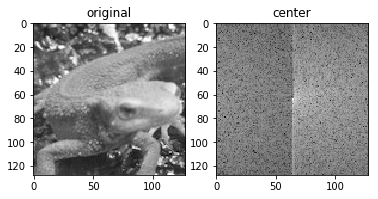

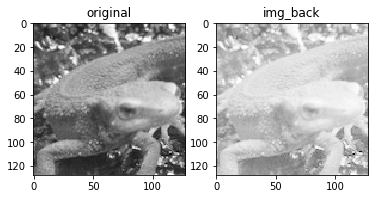

In [9]:
img = cv2.imread("gg.jpg", 0)
img_origin = img.copy()

dft = cv2.dft(np.float32(img), cv2.DFT_COMPLEX_OUTPUT)

dft_shift  = np.fft.fftshift(dft)

# magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
# magnitude_spectrum = np.log(np.abs(dft_shift))
magnitude_spectrum = 20*np.log(np.abs(dft_shift))

img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('original')
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('center')
plt.show()

# 逆变换
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv2.idft(f_ishift)
img_back = 20*np.log(np.abs(img_back))

img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('original')
plt.subplot(122)
plt.imshow(img_back, cmap='gray')
plt.title('img_back')
plt.show()